### THEORY

##### HYPER PLANES AND MARGINS

In [1]:
# we will slowoly build up to :
# Maximum margin classifier
# support vector classifier
# support vector machines

# hyperplane:
# it is a flat affine subspace in an N-dimensinal space
# 1D hyperplane is a single point
# 2D hyperplane is a line
# 3D hyperplane is a flat plane

In [2]:
# the main idea behind SVM is that we can use hyperplane to create a seperation between classes
# then new points will fall on one side of this seperating hyperplane which we can then use toa assign a class

In [3]:
# Maximum margin classifier:
# this is just a margin or a hyperplane drawn to distinguish between classes
# we need to choos a margin which has maximum margin from the classes

In [6]:
# distance between the threshold and the observation is a soft margin
# soft margin allows for misclassification inside the margins allowing us to introduce more bias and to reduce variance (variance = noise)

In [ ]:
# we can use ross validation to determine the optimal size of teh margins

In [7]:
# Support vector classifier is a soft margin which allows for a certain misclassification to add more bias to the model
# it also greatly reduces the variance(noise)

In [ ]:
# when a situation arises where we can not differentiate between classes using a hyperplane line (even with soft margin) here support vector machine comes in

In [ ]:
# SVM use kernels to project data to a higher dimension, in order to use a hyperplane in this higher dimension to seperate the data

In [8]:
# WATCH THE VIDEO TO UNDERSTAND MORE

##### KERNEL INTUITION

In [9]:
# we can transform the features to a higher dimension usingpolynomial kernel
# after we use thos kernel project we can easily seperate the classes using teh soft margin


In [10]:
# in SVC regularization parameter (C). the strength of the reg is inversely propotional to C. Mus be strictly positive. the penalty is a squared 12 penalty.

In [11]:
# in SVM we not only have coeffs for the original features but also for squared of the features

In [12]:
# how to deal with very large feature space
# as polynomial order grows larger the number of computations necessary to solve for margins lso grows
# the answer lies in the kernel trick which makes use of the inner product of vectors, also known as the dot product 

### CLASSIFICATION 

##### PART 1

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('mouse_viral_study.csv')

In [15]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


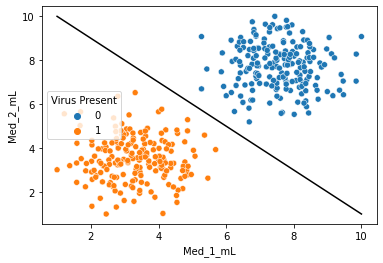

In [18]:
sns.scatterplot(data=df,x='Med_1_mL', y='Med_2_mL', hue = 'Virus Present')

# HYPERPLANE (2D LINE)

x = np.linspace(1,10,100)
m=-1
b=11
y=m*x +b

plt.plot(x,y,'black')

In [19]:
from sklearn.svm import SVC

In [21]:
# help(SVC)

In [22]:
y = df['Virus Present']

In [23]:
X = df.drop('Virus Present', axis = 1)

In [24]:
model = SVC(kernel='linear', C=1000)

In [25]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [26]:
from svm_margin_plot import plot_svm_boundary

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


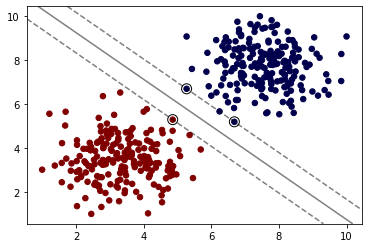

In [27]:
plot_svm_boundary(model,X,y)

##### PART 2

In [43]:
# when we make C saller it include more and more points into the margin making the margin soft and biger
# the bigger the gamma value the more noiseit takes in

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


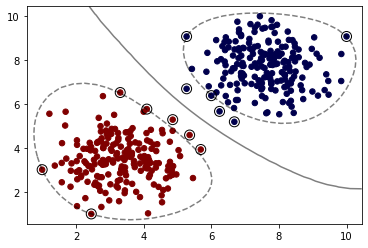

In [45]:
model = SVC(kernel='rbf', C=1, gamma = 'scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


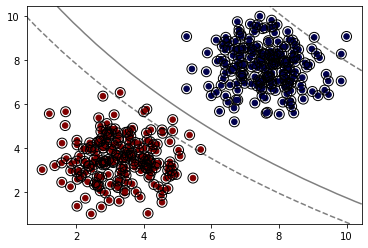

In [49]:
model =SVC(kernel = 'sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)
# sigmoid is not prefered

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


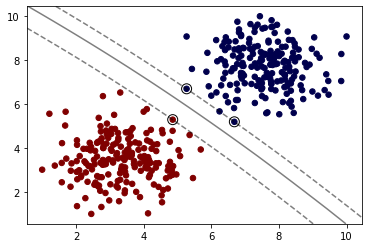

In [56]:
model =SVC(kernel = 'poly', C=1,degree=5)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [57]:
from sklearn.model_selection import GridSearchCV

In [59]:
svm=SVC()
param_grid = {'C':[0.01,0.1,1], 'kernel':['linear','rbf']}

In [60]:
grid = GridSearchCV(svm,param_grid)

In [61]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [62]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

### REGRESSION TASK

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('cement_slump.csv')

In [65]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

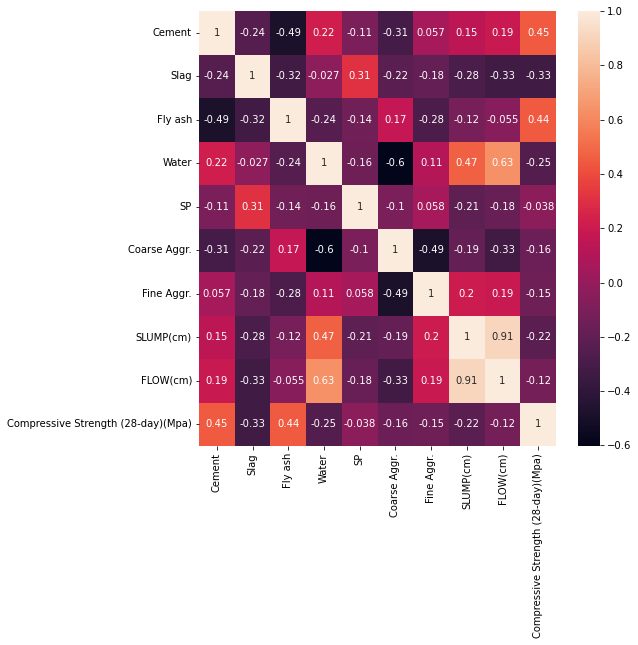

In [68]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [75]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [78]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis = 1)

In [79]:
y = df['Compressive Strength (28-day)(Mpa)']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
scaled_X_train = scaler.fit_transform(X_train)

In [87]:
scaled_X_test = scaler.transform(X_test)

In [88]:
from sklearn.svm import SVR, linearSVR
# linearSVR is faster computation (it only has linear kernel)

In [90]:
# help(SVR)

In [91]:
base_model = SVR()

In [92]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [94]:
base_preds = base_model.predict(scaled_X_test)

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [100]:
mean_absolute_error(y_test, base_preds)

5.236902091259179

In [101]:
np.sqrt(mean_absolute_error(y_test, base_preds))

2.2884278645522516

In [103]:
y_test.mean()

36.26870967741935

In [106]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'kernel':['linear', 'rbf', 'poly'],
              'gamma':['scale', 'auto'],
              'degree':[2,3,4],
              'epsilon': [0,0.01,0.1,0.55,1,2]}

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
svr = SVR()

In [110]:
grid = GridSearchCV(svr, param_grid)

In [111]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.55, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [112]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [113]:
grid_preds =  grid.predict(scaled_X_test)

In [114]:
mean_absolute_error(y_test, grid_preds)

2.512801221076198